In [ ]:
import matplotlib.pyplot as py
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

# PROJECT DETAILS

Name : Aman Jha

Roll Number : 2k18/IT/018

Lab : Deep Learning G2

Task : To evaluate model performance with respect to increasinghyper-parameters in a shallow neural network.

In [ ]:
# Preparing the dataset
# Setup train and test splits

(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_drawing = x_train # X-trainn drawing, is not reshaped and would be used for viewing the images

print("X_Train\n",x_train[0],"\n\n","y_train\n",y_train[0]) # the first number in the dataset is 5

X_Train
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [ ]:
print("X_Train Shape:",x_train.shape,"\n\n","y_train Shape:",y_train.shape)

X_Train Shape: (60000, 28, 28) 

 y_train Shape: (60000,)


In [ ]:
image_size = 784 # since its 28 X 28
x_train = x_train.reshape(x_train.shape[0],image_size)
x_test = x_test.reshape(x_test.shape[0],image_size)

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
print(y_train.shape)
print(y_train[0]) # one-hot form

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


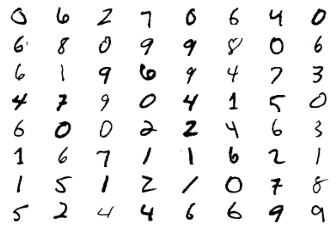

In [ ]:
for i in range(64) :

  ax = plt.subplot(8,8,i+1)
  ax.axis('off')
  plt.imshow(x_train_drawing[randint(0,x_train.shape[0])],cmap = 'Greys')

# Layer with 25 Neurons

In [ ]:
model_25 = Sequential() # feed forward - backward propagate
# eager execution enabled - session online

model_25.add(Dense(units = 25,activation = 'sigmoid',input_shape=(image_size,))) 
model_25.add(Dense(units=num_classes,activation='softmax'))
model_25.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_25.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_25.fit(x_train,y_train,batch_size=128,epochs = 100,verbose=True,validation_split = .1)

lose,accuracy = model_25.evaluate(x_test,y_test,verbose = True)

Epoch 1/100
422/422 [==============================] - 2s 4ms/step - loss: 1.7353 - accuracy: 0.4775 - val_loss: 1.0482 - val_accuracy: 0.8017
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 1.0329 - accuracy: 0.7875 - val_loss: 0.7700 - val_accuracy: 0.8692
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.8107 - accuracy: 0.8375 - val_loss: 0.6393 - val_accuracy: 0.8843
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.6820 - accuracy: 0.8594 - val_loss: 0.5414 - val_accuracy: 0.8968
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.5938 - accuracy: 0.8710 - val_loss: 0.4806 - val_accuracy: 0.9013
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.5403 - accuracy: 0.8773 - val_loss: 0.4442 - val_accuracy: 0.9048
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4971 - accuracy: 0.8861 - val_loss: 0.4302 - val_accuracy: 0.9050

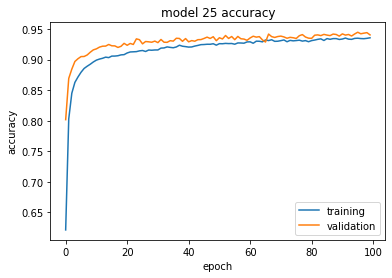

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 25 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

# Layer with 50 Neurons

In [ ]:
model_50 = Sequential() # feed forward - backward propagate
# eager execution enabled - session online

model_50.add(Dense(units = 50,activation = 'sigmoid',input_shape=(image_size,))) 
model_50.add(Dense(units=num_classes,activation='softmax'))
model_50.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_50.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_50.fit(x_train,y_train,batch_size=128,epochs = 100,verbose=True,validation_split = .1)

lose,accuracy = model_50.evaluate(x_test,y_test,verbose = True)

Epoch 1/100
422/422 [==============================] - 2s 4ms/step - loss: 1.6224 - accuracy: 0.5271 - val_loss: 0.7529 - val_accuracy: 0.8550
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7512 - accuracy: 0.8362 - val_loss: 0.5386 - val_accuracy: 0.8883
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.5665 - accuracy: 0.8742 - val_loss: 0.4550 - val_accuracy: 0.9010
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4924 - accuracy: 0.8820 - val_loss: 0.3906 - val_accuracy: 0.9117
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.8937 - val_loss: 0.3620 - val_accuracy: 0.9147
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3988 - accuracy: 0.9019 - val_loss: 0.3329 - val_accuracy: 0.9220
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3703 - accuracy: 0.9084 - val_loss: 0.3089 - val_accuracy: 0.9243

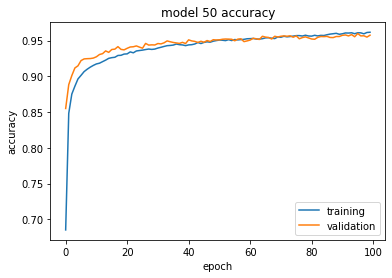

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 50 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

# Layer with 100 Neurons

In [ ]:
model_100 = Sequential() # feed forward - backward propagate
# eager execution enabled - session online

model_100.add(Dense(units = 100,activation = 'sigmoid',input_shape=(image_size,))) 
model_100.add(Dense(units=num_classes,activation='softmax'))
model_100.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_100.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_100.fit(x_train,y_train,batch_size=128,epochs = 100,verbose=True,validation_split = .1)

lose,accuracy = model_100.evaluate(x_test,y_test,verbose = True)

Epoch 1/100
422/422 [==============================] - 2s 4ms/step - loss: 1.5125 - accuracy: 0.5532 - val_loss: 0.6173 - val_accuracy: 0.8707
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 0.6272 - accuracy: 0.8524 - val_loss: 0.4367 - val_accuracy: 0.9020
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 0.4759 - accuracy: 0.8834 - val_loss: 0.3641 - val_accuracy: 0.9145
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.4129 - accuracy: 0.8942 - val_loss: 0.3290 - val_accuracy: 0.9175
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3720 - accuracy: 0.9042 - val_loss: 0.2979 - val_accuracy: 0.9240
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3407 - accuracy: 0.9120 - val_loss: 0.2769 - val_accuracy: 0.9293
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3184 - accuracy: 0.9168 - val_loss: 0.2619 - val_accuracy: 0.9353

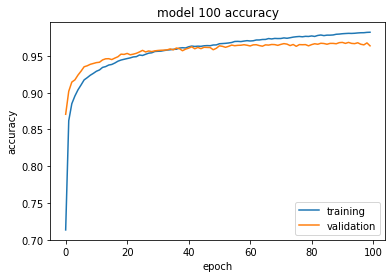

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 100 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

# Layer with 200 Neurons

In [ ]:
model_200 = Sequential() # feed forward - backward propagate
# eager execution enabled - session online

model_200.add(Dense(units = 200,activation = 'sigmoid',input_shape=(image_size,))) 
model_200.add(Dense(units=num_classes,activation='softmax'))
model_200.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_200.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_200.fit(x_train,y_train,batch_size=128,epochs = 100,verbose=True,validation_split = .1)

lose,accuracy = model_200.evaluate(x_test,y_test,verbose = True)

Epoch 1/100
422/422 [==============================] - 2s 5ms/step - loss: 1.4007 - accuracy: 0.5980 - val_loss: 0.5012 - val_accuracy: 0.8940
Epoch 2/100
422/422 [==============================] - 2s 5ms/step - loss: 0.5197 - accuracy: 0.8759 - val_loss: 0.3566 - val_accuracy: 0.9155
Epoch 3/100
422/422 [==============================] - 2s 5ms/step - loss: 0.3983 - accuracy: 0.8961 - val_loss: 0.2976 - val_accuracy: 0.9277
Epoch 4/100
422/422 [==============================] - 2s 5ms/step - loss: 0.3481 - accuracy: 0.9070 - val_loss: 0.2647 - val_accuracy: 0.9325
Epoch 5/100
422/422 [==============================] - 2s 5ms/step - loss: 0.3107 - accuracy: 0.9168 - val_loss: 0.2503 - val_accuracy: 0.9330
Epoch 6/100
422/422 [==============================] - 2s 5ms/step - loss: 0.2819 - accuracy: 0.9245 - val_loss: 0.2339 - val_accuracy: 0.9360
Epoch 7/100
422/422 [==============================] - 2s 5ms/step - loss: 0.2617 - accuracy: 0.9308 - val_loss: 0.2181 - val_accuracy: 0.9443

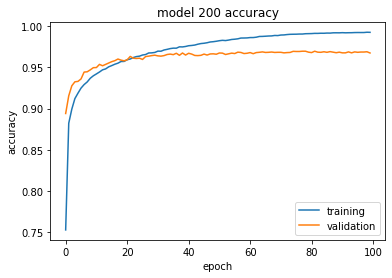

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 200 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

# Layer with 500 Neurons

In [ ]:
model_500 = Sequential() # feed forward - backward propagate
# eager execution enabled - session online

model_500.add(Dense(units = 500,activation = 'sigmoid',input_shape=(image_size,))) 
model_500.add(Dense(units=num_classes,activation='softmax'))
model_500.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_500.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_500.fit(x_train,y_train,batch_size=128,epochs = 10,verbose=True,validation_split = .1) # epochs chaged to 10

lose,accuracy = model_500.evaluate(x_test,y_test,verbose = True)

Epoch 1/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3428 - accuracy: 0.9097 - val_loss: 0.2617 - val_accuracy: 0.9310
Epoch 2/10
422/422 [==============================] - 4s 10ms/step - loss: 0.2916 - accuracy: 0.9223 - val_loss: 0.2358 - val_accuracy: 0.9373
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.2598 - accuracy: 0.9295 - val_loss: 0.2155 - val_accuracy: 0.9432
Epoch 4/10
422/422 [==============================] - 4s 8ms/step - loss: 0.2362 - accuracy: 0.9360 - val_loss: 0.2001 - val_accuracy: 0.9480
Epoch 5/10
422/422 [==============================] - 3s 8ms/step - loss: 0.2174 - accuracy: 0.9417 - val_loss: 0.1889 - val_accuracy: 0.9493
Epoch 6/10
422/422 [==============================] - 3s 8ms/step - loss: 0.1944 - accuracy: 0.9486 - val_loss: 0.1836 - val_accuracy: 0.9507
Epoch 7/10
422/422 [==============================] - 3s 8ms/step - loss: 0.1899 - accuracy: 0.9500 - val_loss: 0.1738 - val_accuracy: 0.9535
Epoch

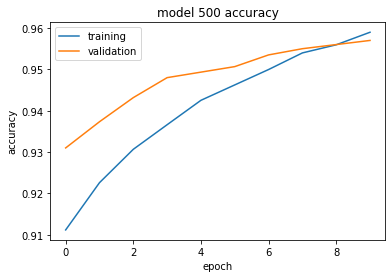

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 500 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

# Layer with 1000 Neurons

In [ ]:
model_1000 = Sequential() # feed forward - backward propagate
# eager execution enabled - session online

model_1000.add(Dense(units = 1000,activation = 'sigmoid',input_shape=(image_size,))) 
model_1000.add(Dense(units=num_classes,activation='softmax'))
model_1000.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1000.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_1000.fit(x_train,y_train,batch_size=128,epochs = 5,verbose=True,validation_split = .1) # epochs chaged to 10

lose,accuracy = model_1000.evaluate(x_test,y_test,verbose = True)

Epoch 1/5
422/422 [==============================] - 6s 14ms/step - loss: 0.9632 - accuracy: 0.7288 - val_loss: 0.3095 - val_accuracy: 0.9220
Epoch 2/5
422/422 [==============================] - 6s 13ms/step - loss: 0.3373 - accuracy: 0.9094 - val_loss: 0.2435 - val_accuracy: 0.9372
Epoch 3/5
422/422 [==============================] - 6s 13ms/step - loss: 0.2729 - accuracy: 0.9258 - val_loss: 0.2100 - val_accuracy: 0.9445
Epoch 4/5
422/422 [==============================] - 6s 13ms/step - loss: 0.2311 - accuracy: 0.9383 - val_loss: 0.1919 - val_accuracy: 0.9520
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 0.2104 - accuracy: 0.9418


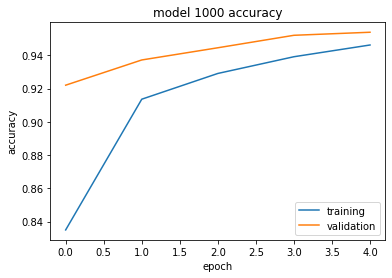

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 1000 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

# Layer with 10000 Neurons

In [ ]:
model_10000 = Sequential() # feed forward - backward propagate
# eager execution enabled - session online

model_10000.add(Dense(units = 10000,activation = 'sigmoid',input_shape=(image_size,))) 
model_10000.add(Dense(units=num_classes,activation='softmax'))
model_10000.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10000)             7850000   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                100010    
Total params: 7,950,010
Trainable params: 7,950,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_10000.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_10000.fit(x_train,y_train,batch_size=128,epochs = 5,verbose=True,validation_split = .1) # epochs chaged to 10

lose,accuracy = model_10000.evaluate(x_test,y_test,verbose = True)

Epoch 1/5
422/422 [==============================] - 42s 98ms/step - loss: 0.7909 - accuracy: 0.8151 - val_loss: 0.1604 - val_accuracy: 0.9577
Epoch 2/5
422/422 [==============================] - 40s 95ms/step - loss: 0.1507 - accuracy: 0.9612 - val_loss: 0.1320 - val_accuracy: 0.9640
Epoch 3/5
422/422 [==============================] - 40s 95ms/step - loss: 0.0917 - accuracy: 0.9815 - val_loss: 0.1139 - val_accuracy: 0.9682
Epoch 4/5
422/422 [==============================] - 40s 95ms/step - loss: 0.0636 - accuracy: 0.9897 - val_loss: 0.1061 - val_accuracy: 0.9703
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 0.1191 - accuracy: 0.9637


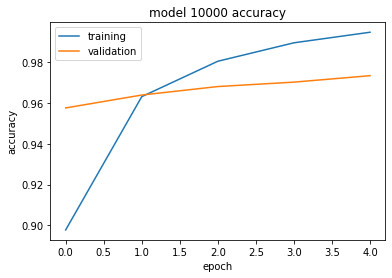

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 10000 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

# Layer with 1,00,000 Neurons

In [ ]:
model_100000 = Sequential() # feed forward - backward propagate
# eager execution enabled - session online

model_100000.add(Dense(units = 100000,activation = 'sigmoid',input_shape=(image_size,))) 
model_100000.add(Dense(units=num_classes,activation='softmax'))
model_100000.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100000)            78500000  
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1000010   
Total params: 79,500,010
Trainable params: 79,500,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_100000.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_100000.fit(x_train,y_train,batch_size=128,epochs = 2,verbose=True,validation_split = .1) # epochs chaged to 10

lose,accuracy = model_100000.evaluate(x_test,y_test,verbose = True)

Epoch 1/2
422/422 [==============================] - 374s 886ms/step - loss: 5.3072 - accuracy: 0.8224 - val_loss: 0.1207 - val_accuracy: 0.9677
Epoch 2/2
183/422 [============>.................] - ETA: 3:21 - loss: 0.0597 - accuracy: 0.9848